## Aplicação do algoritmo de Árvore de Decisão na construção de um classificador para datasets ou conjuntos de dados que são multidimensionais.

In [140]:
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

import graphviz

### Conjunto de dados:

The Complete Pokemon Dataset - Kaggle

https://www.kaggle.com/rounakbanik/pokemon 

In [141]:
dataset_filename = 'datasets/pokemon.csv'

In [142]:
df_pokemon = pd.read_csv(dataset_filename, engine='python')

Dimensões:

In [143]:
df_pokemon.shape

(801, 41)

In [144]:
df_pokemon.sample(4)

abilities  against_bug  \
406  ['Natural Cure', 'Poison Point', 'Technician']          1.0   
755     ['Illuminate', 'Effect Spore', 'Rain Dish']          1.0   
615        ['Hydration', 'Shell Armor', 'Overcoat']          1.0   
400                       ['Shed Skin', 'Run Away']          1.0   

     against_dark  against_dragon  against_electric  against_fairy  \
406           1.0             1.0               0.5            0.5   
755           0.5             0.0               0.5            1.0   
615           1.0             1.0               1.0            1.0   
400           1.0             1.0               1.0            1.0   

     against_fight  against_fire  against_flying  against_ghost  ...  \
406            0.5           2.0             2.0            1.0  ...   
755            0.5           2.0             2.0            1.0  ...   
615            0.5           2.0             2.0            1.0  ...   
400            0.5           2.0             2.0            1.0  ...   

     percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1  \
406             50.0             407        125         105     90  grass   
755             50.0             756         90         100     30  grass   
615             50.0             616         40          65     25    bug   
400             50.0             401         25          41     25    bug   

      type2  weight_kg  generation  is_legendary  
406  poison       14.5           4             0  
755   fairy       11.5           7             0  
615     NaN        7.7           5             0  
400     NaN        2.2           4             0  

[4 rows x 41 columns]

Atributos:

In [145]:
df_pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [146]:
"""
from PIL import Image
import scipy.misc
import random

qnt_x=10
qnt_y=3

plt.figure(figsize=(15, 6))
x, y = qnt_x, qnt_y
qnt_max = x*y
for i in range(0, qnt_x * qnt_y):
    plt.axis("off")
    plt.subplot(y, x, i+1)
    random_pdex_number = random.randint(1, df_pokemon['pokedex_number'].max())
    image = Image.open('datasets/pokedex/'+f'{random_pdex_number:03d}'+'.png')
    plt.imshow(image)
    #plt.text(y, x, '...')
plt.axis("off")    
plt.show()
plt.close()
"""

'\nfrom PIL import Image\nimport scipy.misc\nimport random\n\nqnt_x=10\nqnt_y=3\n\nplt.figure(figsize=(15, 6))\nx, y = qnt_x, qnt_y\nqnt_max = x*y\nfor i in range(0, qnt_x * qnt_y):\n    plt.axis("off")\n    plt.subplot(y, x, i+1)\n    random_pdex_number = random.randint(1, df_pokemon[\'pokedex_number\'].max())\n    image = Image.open(\'datasets/pokedex/\'+f\'{random_pdex_number:03d}\'+\'.png\')\n    plt.imshow(image)\n    #plt.text(y, x, \'...\')\nplt.axis("off")    \nplt.show()\nplt.close()\n'

### Tratamento dos dados

Limpeza dos dados:

Existem dados faltantes (missing data ou nulos)?

### Organização dos dados

In [147]:
columns = ['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water']

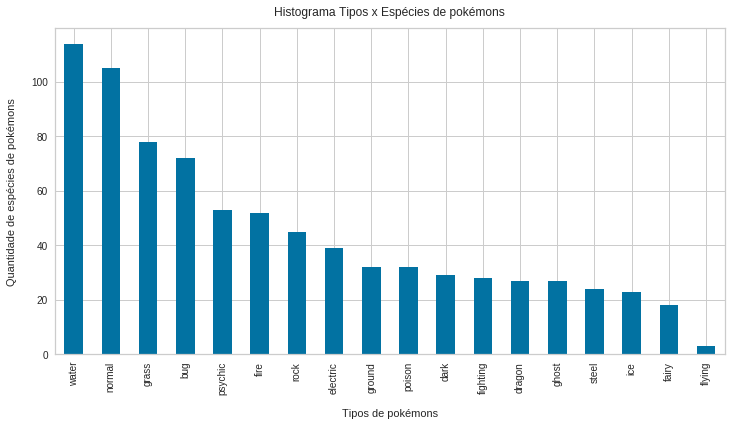

In [148]:
plt.figure(figsize=(12,6))
df_pokemon['type1'].value_counts().plot(kind='bar')
plt.xlabel("Tipos de pokémons", labelpad=14)
plt.ylabel("Quantidade de espécies de pokémons", labelpad=14)

plt.title("Histograma Tipos x Espécies de pokémons", y=1.02);

Definição das classes

In [149]:
y_labels = df_pokemon['type1']
classes = np.unique(df_pokemon['type1'])

Criação de um subconjunto de dados

In [150]:
df_pokemon = df_pokemon[columns]
X = df_pokemon[columns].values

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.25, random_state=42)

In [152]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

600 201 600 201


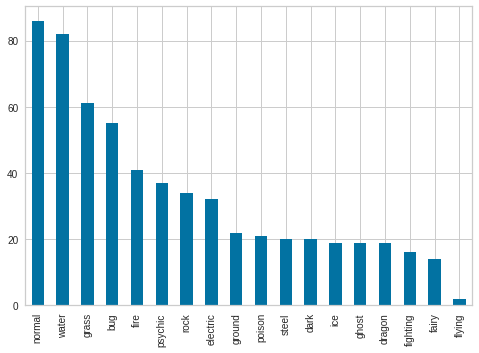

In [153]:
y_train.value_counts().plot(kind='bar')

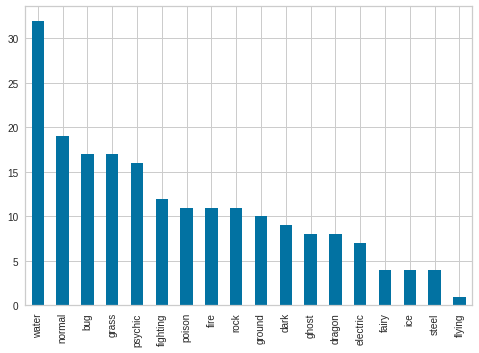

In [154]:
y_test.value_counts().plot(kind='bar')

In [155]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

In [156]:
score = decision_tree.score(X_test, y_test)
y_score = decision_tree.predict(X_test)

In [157]:
y_score[:5]

array(['rock', 'fairy', 'psychic', 'water', 'fighting'], dtype=object)

### Validação

In [158]:
cfm = confusion_matrix(y_test, y_score)

In [159]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

         bug       0.77      1.00      0.87        17
        dark       1.00      1.00      1.00         9
      dragon       0.58      0.88      0.70         8
    electric       1.00      1.00      1.00         7
       fairy       1.00      1.00      1.00         4
    fighting       1.00      0.92      0.96        12
        fire       1.00      0.82      0.90        11
      flying       0.00      0.00      0.00         1
       ghost       0.88      0.88      0.88         8
       grass       0.94      0.94      0.94        17
      ground       0.78      0.70      0.74        10
         ice       0.67      1.00      0.80         4
      normal       1.00      1.00      1.00        19
      poison       0.80      0.73      0.76        11
     psychic       1.00      0.94      0.97        16
        rock       0.75      0.82      0.78        11
       steel       0.67      1.00      0.80         4
       water       1.00    

/home/ronildo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


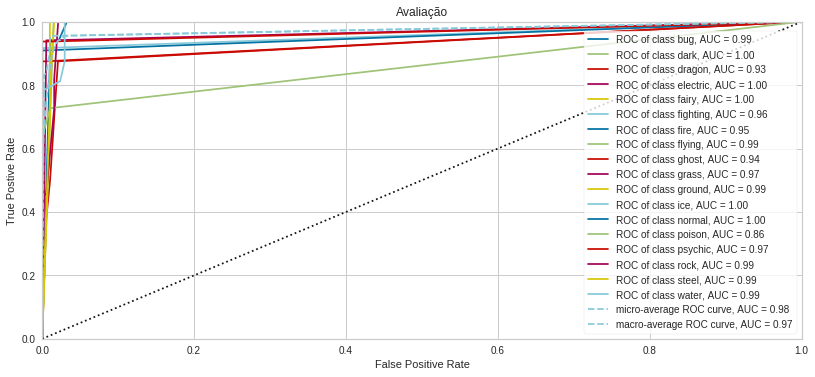

In [160]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf, classes=classes, title='Avaliação', size=(980, 420))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [161]:
#tree.plot_tree(decision_tree) 

In [162]:
"""
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
"""

'\ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data)\n'

In [163]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=columns,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)

In [164]:
graph.render('output/pokemon')

'output/pokemon.pdf'

Referências

- https://www.kaggle.com/terminus7/pokemon-challenge
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://github.com/RonildoOliveira/GEAM---UFC-Qx